In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn as sk

In [2]:
df=pd.read_csv('combined_data_with_loc.csv')
df.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.230377,4.251470
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.212552,3.839001
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,27.049690
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,27.933349,0.047723
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,12.021947


In [3]:
print(df['Community Name'])

0            Ascot Vale
1             Braybrook
2           Craigieburn
3               Croydon
4               Fawkner
5             Footscray
6               Glenroy
7          Malvern East
8               Malvern
9     Melbourne Airport
10              Mentone
11            Moorabbin
12           Mordialloc
13          Murrumbeena
14           Noble Park
15      North Melbourne
16            Northcote
17            Parkville
18    Pascoe Vale South
19       Port Melbourne
20              Prahran
21           Somerville
22             Sorrento
23      South Melbourne
24          South Yarra
25           Springvale
26     St Andrews Beach
27        St Kilda East
28             St Kilda
29        St Kilda West
30               Toorak
31                Tyabb
32            Waterways
33              Windsor
Name: Community Name, dtype: object


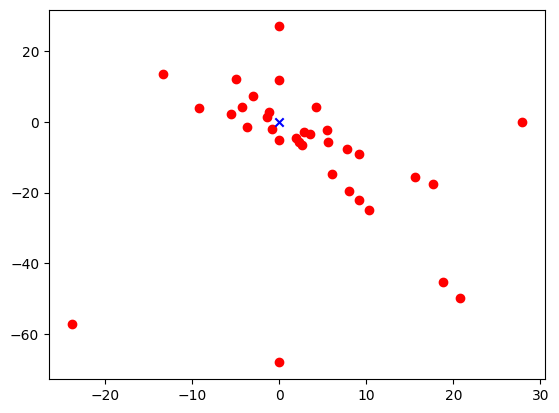

In [4]:
locs=np.asarray(list(zip(df['cart_x'],df['cart_y'])))

# plot locs on a scatter plot, with (0,0) at the center
plt.scatter(locs[:,0],locs[:,1],color='red')
plt.scatter(0,0,color='blue', marker='x')
plt.show()


DescribeResult(nobs=34, minmax=(array([-23.8364841 , -68.12017913]), array([27.93334923, 27.04969046])), mean=array([ 3.19919332, -8.85161919]), variance=array([ 98.70338635, 416.25255756]), skewness=array([ 0.04737478, -1.29084182]), kurtosis=array([1.01840203, 1.52678611]))
[-1.34419175  2.4833545   7.96892529]
[-15.37890098  -4.08438017   2.65811421]


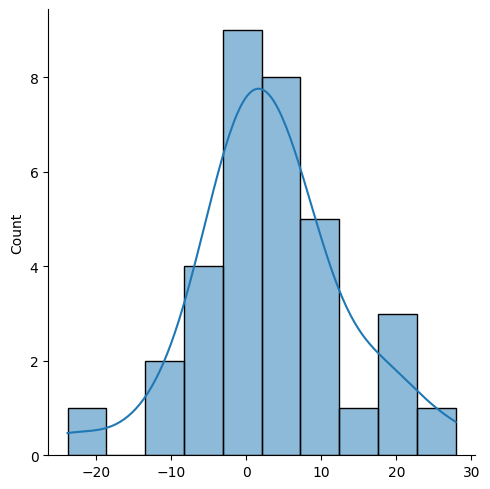

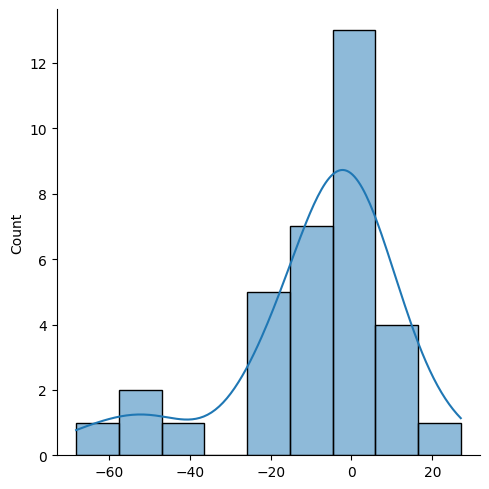

In [5]:
# describe the locational data
import scipy.stats as stats
print(stats.describe(locs))

# print the quartiles for the x and y coordinates
print(np.percentile(locs[:,0], [25, 50, 75]))
print(np.percentile(locs[:,1], [25, 50, 75]))

sns.displot(locs[:,0], kde=True)
plt.show()

sns.displot(locs[:,1], kde=True)
plt.show()




In [6]:
# perform shapiro-wilk test for normality of x and y coordinates
print(stats.shapiro(locs[:,0]))
print(stats.shapiro(locs[:,1]))

# perform anderson-darling test for normality of x and y coordinates
print(stats.anderson(locs[:,0]))
print(stats.anderson(locs[:,1]))


ShapiroResult(statistic=np.float64(0.9670688954563095), pvalue=np.float64(0.3855347856075575))
ShapiroResult(statistic=np.float64(0.8707230058313595), pvalue=np.float64(0.00084308888086645))
AndersonResult(statistic=np.float64(0.5158051454446735), critical_values=array([0.526, 0.599, 0.718, 0.838, 0.996]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(3.199193322824144), scale=np.float64(9.934957793182829))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=np.float64(1.7286553541403507), critical_values=array([0.526, 0.599, 0.718, 0.838, 0.996]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(-8.851619191333763), scale=np.float64(20.4022684415311))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


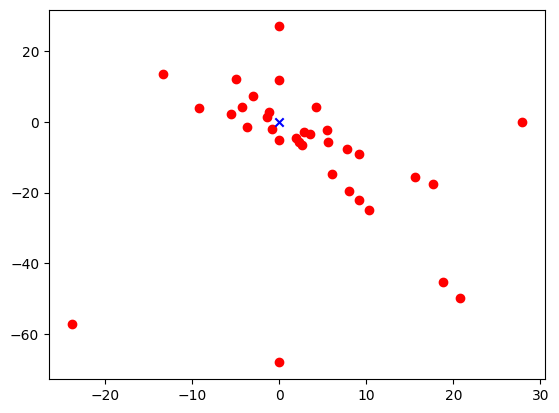

In [7]:
# Apply min-max scaling to the locational data
scaler = sk.preprocessing.MinMaxScaler()
# locs_scaled = scaler.fit_transform(locs)

locs_scaled = locs

plt.scatter(locs_scaled[:,0],locs_scaled[:,1],color='red')
# scale the origin as well
origin = np.array([[0,0]])
# origin_scaled = scaler.transform(origin)
origin_scaled = origin
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()

DescribeResult(nobs=34, minmax=(array([-23.8364841 , -68.12017913]), array([27.93334923, 27.04969046])), mean=array([ 3.19919332, -8.85161919]), variance=array([ 98.70338635, 416.25255756]), skewness=array([ 0.04737478, -1.29084182]), kurtosis=array([1.01840203, 1.52678611]))
[-1.34419175  2.4833545   7.96892529]
[-15.37890098  -4.08438017   2.65811421]


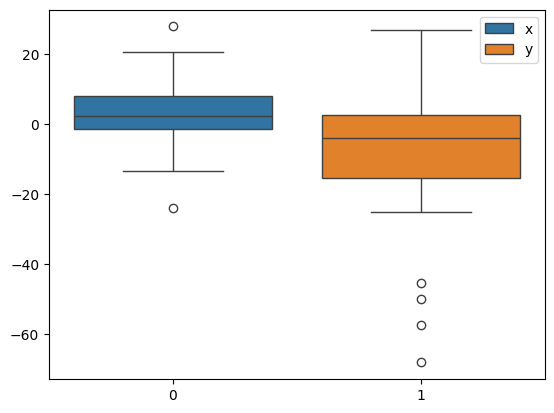

In [8]:
# Determine the distribution of the scaled data
print(stats.describe(locs_scaled))

# print the quartiles for the x and y coordinates
print(np.percentile(locs_scaled[:,0], [25, 50, 75]))
print(np.percentile(locs_scaled[:,1], [25, 50, 75]))

# do a boxplot of the scaled data
sns.boxplot(data=locs_scaled)
# show the legend
plt.legend(['x','y'])
plt.show()

Number of outliers in x co-ordinate: 2


Number of outliers in y co-ordinate: 4
Total number of outliers (either in x or y): 5


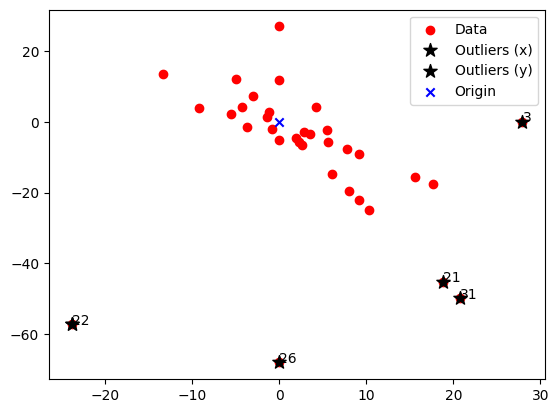

In [9]:
# count the number of 'outliers' in the scaled data in terms of IQR
# these are the far away points from the main 'mass' of the data
q1_x, q3_x = np.percentile(locs_scaled[:,0], [25, 75])
iqr_x = q3_x - q1_x
outliers_x = (locs_scaled[:,0] < q1_x - 1.5*iqr_x) | (locs_scaled[:,0] > q3_x + 1.5*iqr_x)
print('Number of outliers in x co-ordinate:',np.sum(outliers_x))

q1_y, q3_y = np.percentile(locs_scaled[:,1], [25, 75])
iqr_y = q3_y - q1_y
outliers_y = (locs_scaled[:,1] < q1_y - 1.5*iqr_y) | (locs_scaled[:,1] > q3_y + 1.5*iqr_y)
print('Number of outliers in y co-ordinate:',np.sum(outliers_y))

# count the total number of outliers
print('Total number of outliers (either in x or y):',np.sum(outliers_x | outliers_y))

# highlight the outliers in the scatter plot
plt.scatter(locs_scaled[:,0],locs_scaled[:,1],color='red')
plt.scatter(locs_scaled[outliers_x,0],locs_scaled[outliers_x,1],color='black', marker='*',s=100)
plt.scatter(locs_scaled[outliers_y,0],locs_scaled[outliers_y,1],color='black', marker='*',s=100)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')

# also annotate each outlier with the corresponding index
for i in np.where(outliers_x | outliers_y)[0]:
	plt.annotate(i, (locs_scaled[i,0]+.01,locs_scaled[i,1]+.01))

# show the legend
plt.legend(['Data','Outliers (x)','Outliers (y)','Origin'])
plt.show()


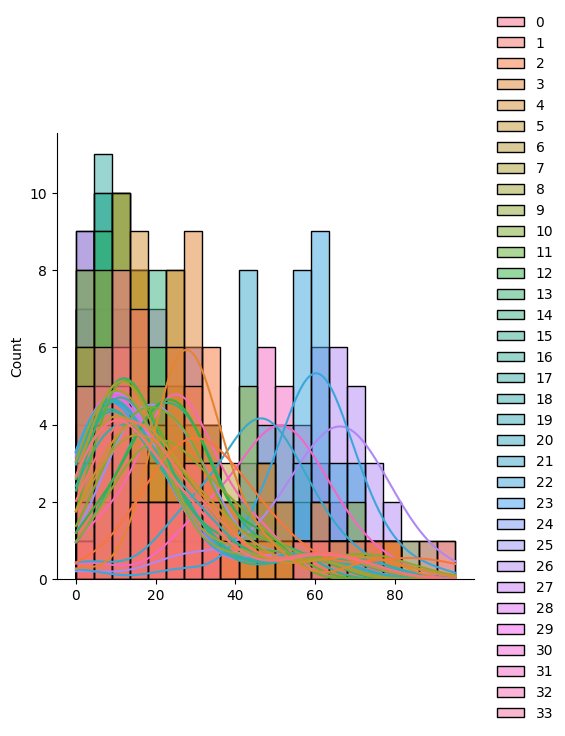

In [10]:
# However, we are yet to consider the pair-wise distances between the points
# We will now calculate the pair-wise distances between the points and analyze them
# We will use the euclidean distance for this purpose
from scipy import spatial
distances = spatial.distance.pdist(locs)
# convert the distances to a square matrix
dist_matrix = spatial.distance.squareform(distances)

# plot the histogram of the distances
sns.displot(dist_matrix, kde=True)
plt.show()

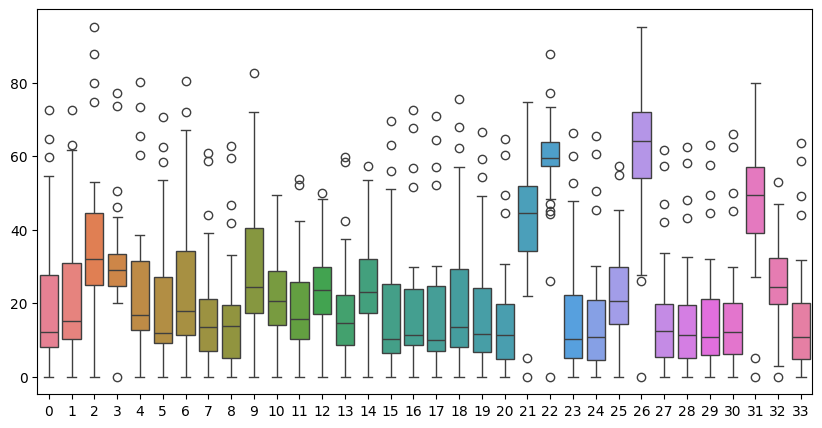

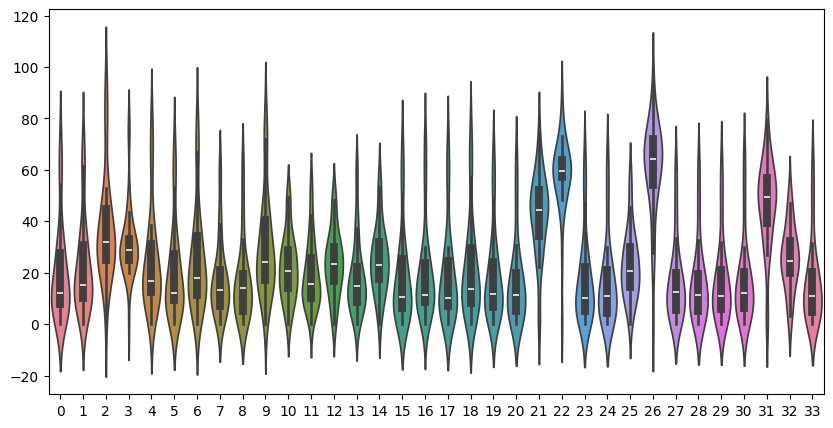

In [11]:
# boxplot of the distances
plt.figure(figsize=(10,5))
sns.boxplot(data=dist_matrix)
plt.show()
# use violin plot to show the distribution of the distances
plt.figure(figsize=(10,5))
sns.violinplot(data=dist_matrix)
plt.show()

Number of outliers in terms of distances: 7
Indices of the outliers: [ 2  4  6  9 22 26 31]
Threshold distance: 78.39754768803331


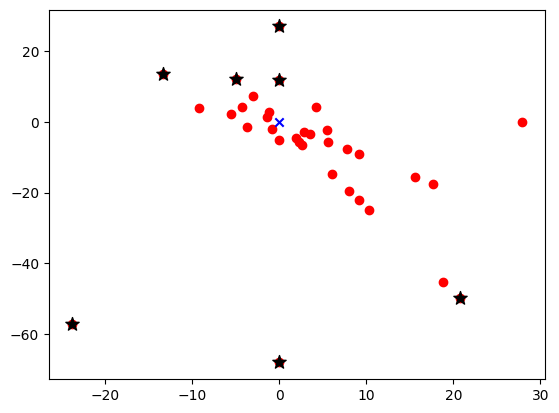

In [12]:
# Identify the points for which the distances with other points have very long tails
# We will consider the 99th percentile as the threshold for the tail
threshold = np.percentile(dist_matrix, 99)
outliers_dist = np.any(dist_matrix > threshold, axis=1)
print('Number of outliers in terms of distances:',np.sum(outliers_dist))
print('Indices of the outliers:',np.where(outliers_dist)[0])
print('Threshold distance:',threshold)

# highlight the outliers in the scatter plot
plt.scatter(locs_scaled[:,0],locs_scaled[:,1],color='red')
plt.scatter(locs_scaled[outliers_dist,0],locs_scaled[outliers_dist,1],color='black', marker='*',s=100)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()


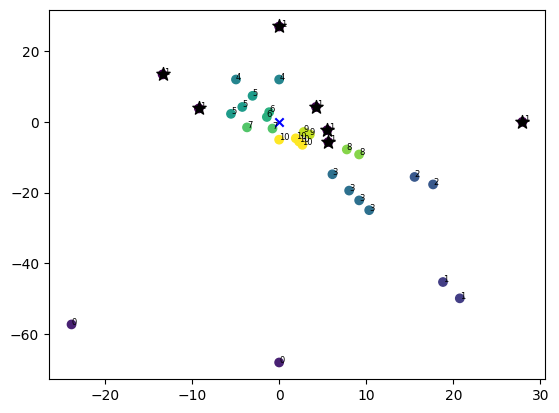

Number of clusters: 12
Number of noise points: 7


In [13]:
# Now do HDBSCAN clustering on the locational data

import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True, min_samples=1)
clusterer.fit(locs_scaled)

# plot the clusters
plt.scatter(locs_scaled[:,0],locs_scaled[:,1],c=clusterer.labels_)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
# highlight the noise points
plt.scatter(locs_scaled[clusterer.labels_==-1,0],locs_scaled[clusterer.labels_==-1,1],color='black', marker='*',s=100)
# annotate each point with the corresponding cluster label
for i in range(len(locs_scaled)):
	plt.annotate(clusterer.labels_[i], (locs_scaled[i,0],locs_scaled[i,1]), size=6)

plt.show()
print('Number of clusters:',len(np.unique(clusterer.labels_)))
print('Number of noise points:',np.sum(clusterer.labels_==-1))

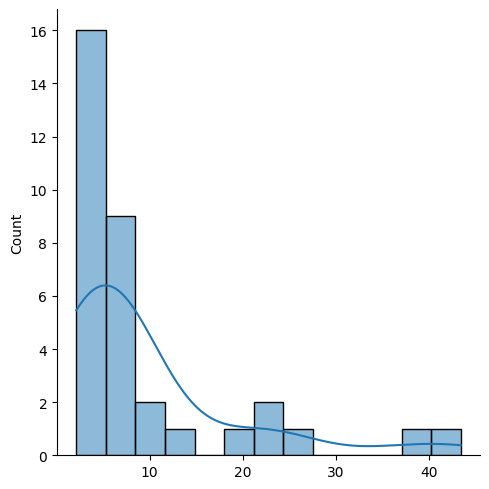

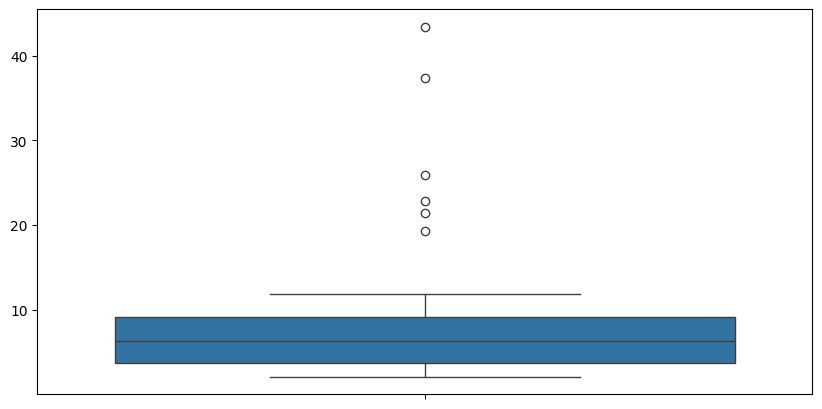

Number of outliers in terms of average distances: 6
Indices of the outliers: [ 2  3 21 22 26 31]
Threshold distance: 17.2782130244307


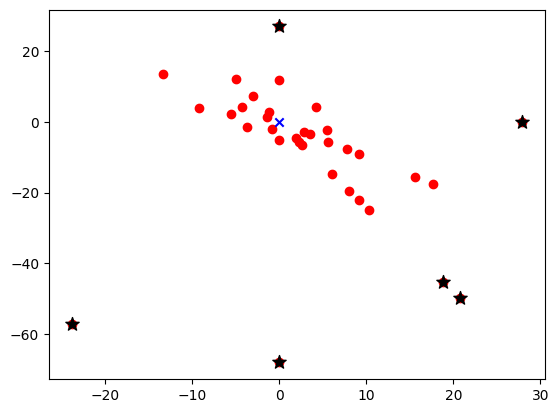

In [14]:
# Now, do the following: For each point take the top 5 nearest neighbors and calculate the average distance
# to these neighbors. Then, plot the histogram of these average distances.
# We will use the KDTree for this purpose
from scipy.spatial import KDTree
tree = KDTree(locs)
# get the 6 nearest neighbors (including the point itself)
distances, indices = tree.query(locs, k=7)
# calculate the average distance to the 5 nearest neighbors
avg_distances = np.mean(distances[:,1:], axis=1)
# plot the histogram of the average distances
sns.displot(avg_distances, kde=True)
plt.show()

# boxplot of the average distances
plt.figure(figsize=(10,5))
sns.boxplot(data=avg_distances)
plt.show()


# Find out the points for which the average distance to the 5 nearest neighbors is very high

IQR=np.percentile(avg_distances, [25, 75])
IQR_dist = IQR[1] - IQR[0]

threshold = IQR[1] + 1.5*IQR_dist
outliers_avg_dist = avg_distances > threshold
print('Number of outliers in terms of average distances:',np.sum(outliers_avg_dist))
print('Indices of the outliers:',np.where(outliers_avg_dist)[0])
print('Threshold distance:',threshold)

# highlight the outliers in the scatter plot
plt.scatter(locs_scaled[:,0],locs_scaled[:,1],color='red')
plt.scatter(locs_scaled[outliers_avg_dist,0],locs_scaled[outliers_avg_dist,1],color='black', marker='*',s=100)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()

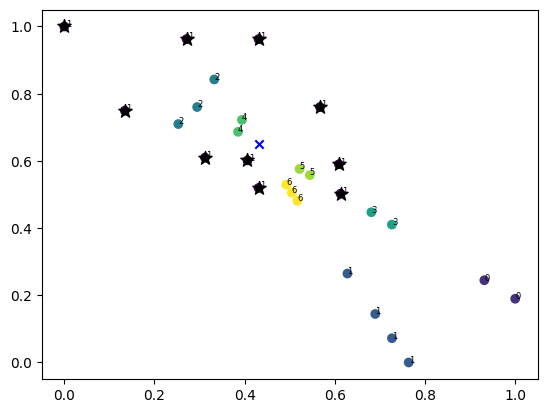

In [15]:
# drop the outliers and re-run the clustering
locs_scaled_filtered = locs_scaled[~outliers_avg_dist]
# re-scale the points
scaler_filtered = sk.preprocessing.MinMaxScaler()
locs_scaled_filtered = scaler_filtered.fit_transform(locs_scaled_filtered)
# re-scale the origin
origin_scaled = scaler_filtered.transform(origin)
clusterer_filtered = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True, min_samples=1)
clusterer_filtered.fit(locs_scaled_filtered)

# plot the clusters
plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=clusterer_filtered.labels_)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
# highlight the noise points
plt.scatter(locs_scaled_filtered[clusterer_filtered.labels_==-1,0],locs_scaled_filtered[clusterer_filtered.labels_==-1,1],color='black', marker='*',s=100)
# annotate each point with the corresponding cluster label
for i in range(len(locs_scaled_filtered)):
	plt.annotate(clusterer_filtered.labels_[i], (locs_scaled_filtered[i,0],locs_scaled_filtered[i,1]), size=6)

plt.show()


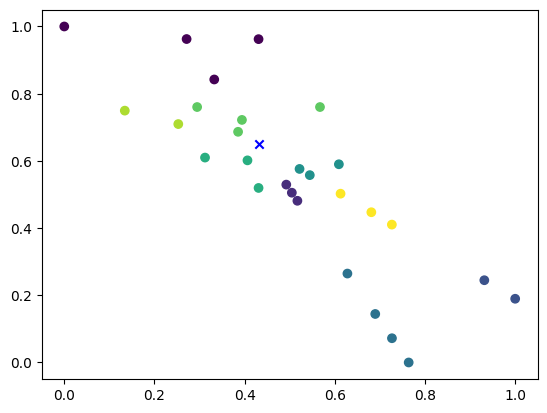

In [16]:
# run spectral clustering on the locational data
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=9, affinity='nearest_neighbors', n_neighbors=5)
spectral.fit(locs_scaled_filtered)

# plot the clusters
plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=spectral.labels_)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()



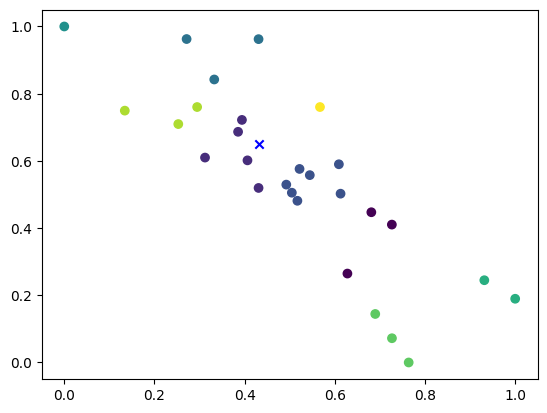

In [17]:
# try hierarchical clustering on the filtered locational data
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=9)
agg.fit(locs_scaled_filtered)

# plot the clusters
plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=agg.labels_)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()

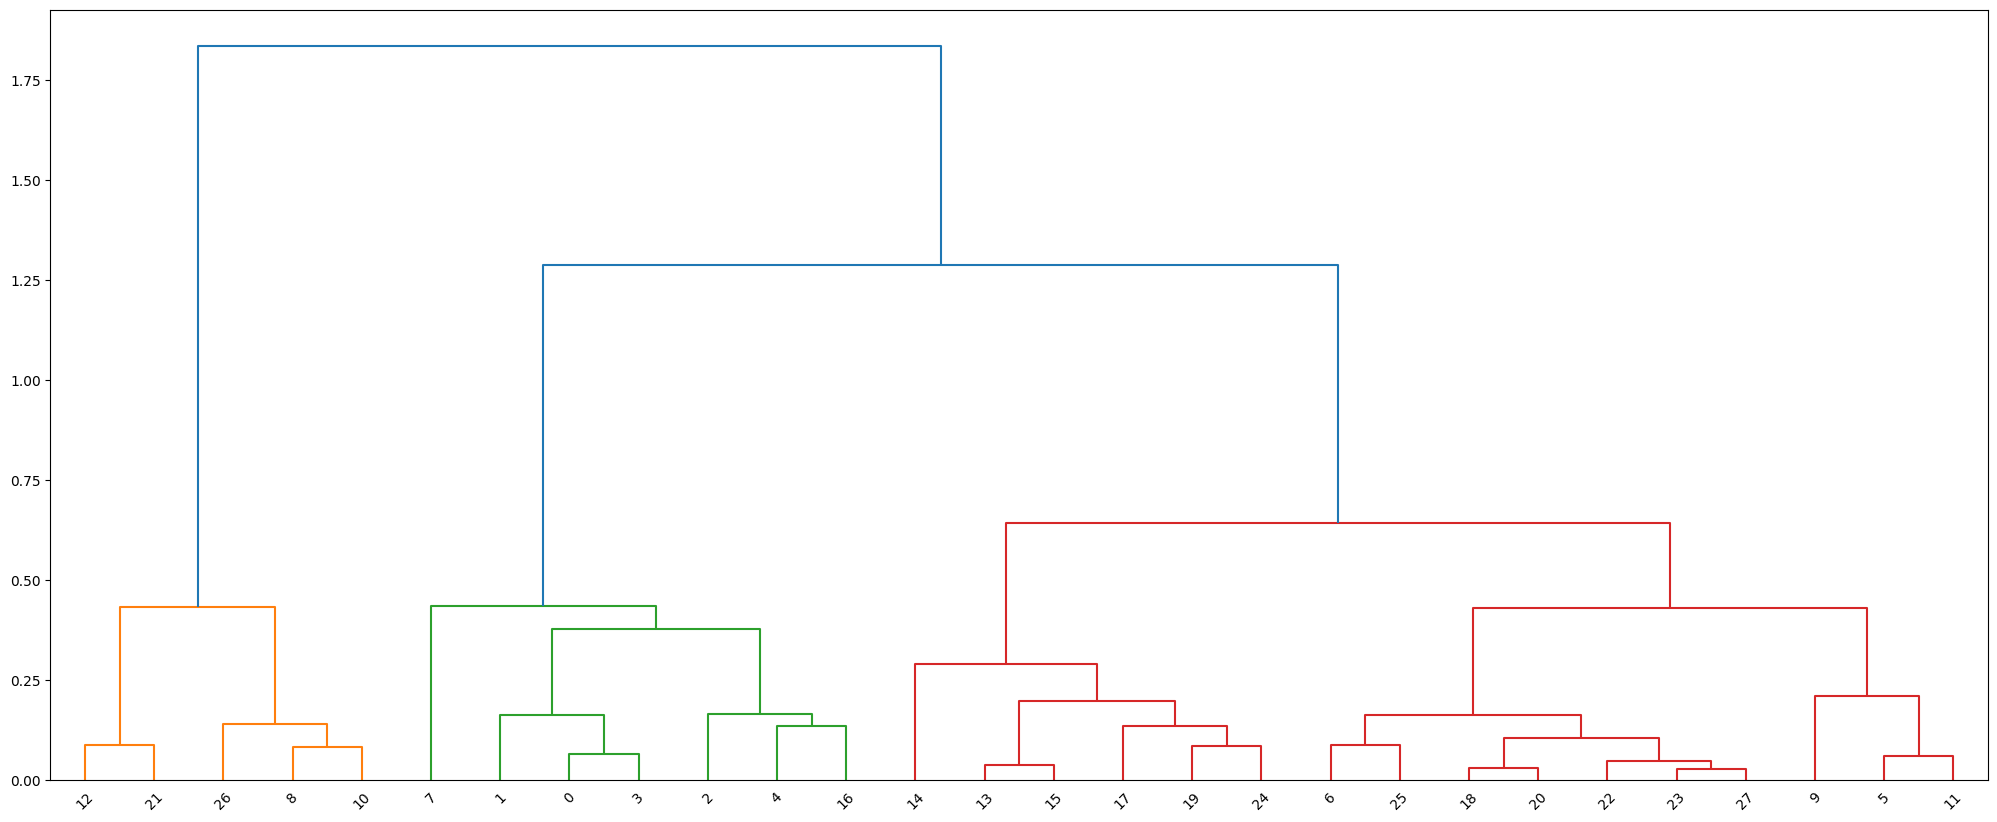

In [18]:
# show the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(locs_scaled_filtered, 'ward')
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

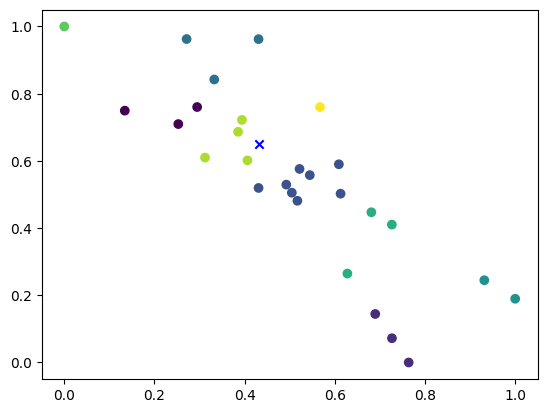

In [19]:
# try k-means clustering on the filtered locational data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0, n_init=100)
kmeans.fit(locs_scaled_filtered)

# plot the clusters
plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=kmeans.labels_)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()


In [20]:
# compute NMI between the hierarchical clustering and the k-means clustering
from sklearn.metrics.cluster import normalized_mutual_info_score
nmi = normalized_mutual_info_score(agg.labels_, kmeans.labels_)
print('NMI between hierarchical clustering and k-means clustering:',nmi)

# compute NMI between the hierarchical clustering and the spectral clustering
nmi = normalized_mutual_info_score(agg.labels_, spectral.labels_)
print('NMI between hierarchical clustering and spectral clustering:',nmi)

# compute NMI between the k-means clustering and the spectral clustering
nmi = normalized_mutual_info_score(kmeans.labels_, spectral.labels_)
print('NMI between k-means clustering and spectral clustering:',nmi)



NMI between hierarchical clustering and k-means clustering: 0.9514485029796368
NMI between hierarchical clustering and spectral clustering: 0.7895885904261231
NMI between k-means clustering and spectral clustering: 0.7517331033519348


In [21]:
# Compute ARI between the hierarchical clustering and the k-means clustering
from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(agg.labels_, kmeans.labels_)
print('ARI between hierarchical clustering and k-means clustering:',ari)

# Compute ARI between the hierarchical clustering and the spectral clustering
ari = adjusted_rand_score(agg.labels_, spectral.labels_)
print('ARI between hierarchical clustering and spectral clustering:',ari)

# Compute ARI between the k-means clustering and the spectral clustering
ari = adjusted_rand_score(kmeans.labels_, spectral.labels_)
print('ARI between k-means clustering and spectral clustering:',ari)

ARI between hierarchical clustering and k-means clustering: 0.8625999603463089
ARI between hierarchical clustering and spectral clustering: 0.4456622414325409
ARI between k-means clustering and spectral clustering: 0.36657481194607877


In [22]:
# Compute ARI between the HDBSCAN clustering and the k-means clustering
ari = adjusted_rand_score(clusterer_filtered.labels_, kmeans.labels_)
print('ARI between HDBSCAN clustering and k-means clustering:',ari)

# Compute ARI between the HDBSCAN clustering and the spectral clustering
ari = adjusted_rand_score(clusterer_filtered.labels_, spectral.labels_)
print('ARI between HDBSCAN clustering and spectral clustering:',ari)

# Compute ARI between the HDBSCAN clustering and the hierarchical clustering
ari = adjusted_rand_score(clusterer_filtered.labels_, agg.labels_)
print('ARI between HDBSCAN clustering and hierarchical clustering:',ari)

ARI between HDBSCAN clustering and k-means clustering: 0.18130521516101453
ARI between HDBSCAN clustering and spectral clustering: 0.33472
ARI between HDBSCAN clustering and hierarchical clustering: 0.1960258726181458


In [23]:
# Compute silouhette score for the k-means clustering
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(locs_scaled_filtered, kmeans.labels_)
print('Silhouette score for k-means clustering:',sil_score)

# Compute silouhette score for the spectral clustering
sil_score = silhouette_score(locs_scaled_filtered, spectral.labels_)
print('Silhouette score for spectral clustering:',sil_score)

# Compute silouhette score for the hierarchical clustering
sil_score = silhouette_score(locs_scaled_filtered, agg.labels_)
print('Silhouette score for hierarchical clustering:',sil_score)

Silhouette score for k-means clustering: 0.4061497159014717
Silhouette score for spectral clustering: 0.26789969247360423
Silhouette score for hierarchical clustering: 0.386185738839505


In [24]:
# Compute Davies-Bouldin index for the k-means clustering
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(locs_scaled_filtered, kmeans.labels_)
print('Davies-Bouldin index for k-means clustering:',db_score)

# Compute Davies-Bouldin index for the spectral clustering
db_score = davies_bouldin_score(locs_scaled_filtered, spectral.labels_)
print('Davies-Bouldin index for spectral clustering:',db_score)

# Compute Davies-Bouldin index for the hierarchical clustering
db_score = davies_bouldin_score(locs_scaled_filtered, agg.labels_)
print('Davies-Bouldin index for hierarchical clustering:',db_score)

Davies-Bouldin index for k-means clustering: 0.5515004892063058
Davies-Bouldin index for spectral clustering: 0.72926318779107
Davies-Bouldin index for hierarchical clustering: 0.5569373077210215


In [25]:
# Compute Calinski-Harabasz index for the k-means clustering
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(locs_scaled_filtered, kmeans.labels_)
print('Calinski-Harabasz index for k-means clustering:',ch_score)

# Compute Calinski-Harabasz index for the spectral clustering
ch_score = calinski_harabasz_score(locs_scaled_filtered, spectral.labels_)
print('Calinski-Harabasz index for spectral clustering:',ch_score)

# Compute Calinski-Harabasz index for the hierarchical clustering
ch_score = calinski_harabasz_score(locs_scaled_filtered, agg.labels_)
print('Calinski-Harabasz index for hierarchical clustering:',ch_score)

Calinski-Harabasz index for k-means clustering: 57.04436794605282
Calinski-Harabasz index for spectral clustering: 28.6491775029424
Calinski-Harabasz index for hierarchical clustering: 54.416085432247755


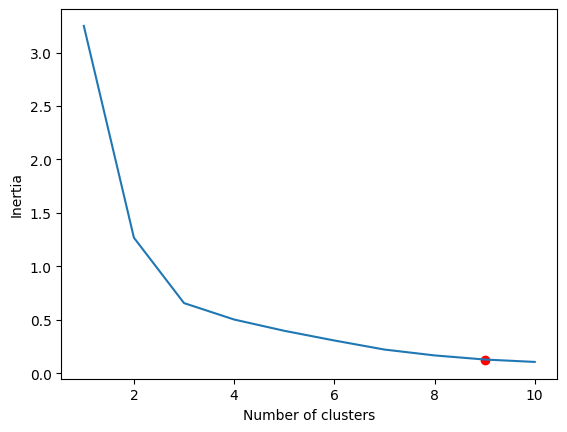

In [26]:
# run elbow method to determine the optimal number of clusters for k-means clustering
inertia = []
for i in range(1, 11):
	kmeans = KMeans(n_clusters=i, random_state=0, n_init=100)
	kmeans.fit(locs_scaled_filtered)
	inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.scatter(9, inertia[8], color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

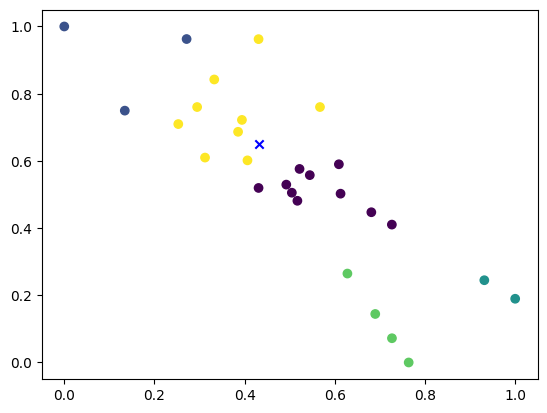

In [27]:
# rerun k-means clustering with the 3 clusters
kmeans = KMeans(n_clusters=5, random_state=0, n_init=100)
kmeans.fit(locs_scaled_filtered)

# plot the clusters
plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=kmeans.labels_)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()


In [28]:
# rerun k-means clustering with the 3 clusters
n=5

def kmeans_clustering(n):

	kmeans = KMeans(n_clusters=n, random_state=0, n_init=100)
	kmeans.fit(locs_scaled_filtered)

	# plot the clusters
	# plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=kmeans.labels_)
	# plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
	# plt.show()




	# now compute the silhouette score for the 3-cluster k-means clustering
	sil_score = silhouette_score(locs_scaled_filtered, kmeans.labels_)
	print(f'Silhouette score for {n}-cluster k-means clustering:',sil_score)

	# now compute the Davies-Bouldin index for the 3-cluster k-means clustering
	db_score = davies_bouldin_score(locs_scaled_filtered, kmeans.labels_)
	print(f'Davies-Bouldin index for {n}-cluster k-means clustering:',db_score)

	# now compute the Calinski-Harabasz index for the 3-cluster k-means clustering
	ch_score = calinski_harabasz_score(locs_scaled_filtered, kmeans.labels_)
	print(f'Calinski-Harabasz index for {n}-cluster k-means clustering:',ch_score)

In [29]:
for i in range(2,10):
	kmeans_clustering(i)

Silhouette score for 2-cluster k-means clustering: 0.5178147004642039
Davies-Bouldin index for 2-cluster k-means clustering: 0.6433624618303299
Calinski-Harabasz index for 2-cluster k-means clustering: 40.58910288568107
Silhouette score for 3-cluster k-means clustering: 0.45936357241965087
Davies-Bouldin index for 3-cluster k-means clustering: 0.6607352016634597
Calinski-Harabasz index for 3-cluster k-means clustering: 49.276304585917345
Silhouette score for 4-cluster k-means clustering: 0.3874366080379195
Davies-Bouldin index for 4-cluster k-means clustering: 0.8071274697155987
Calinski-Harabasz index for 4-cluster k-means clustering: 43.59758274773721
Silhouette score for 5-cluster k-means clustering: 0.4026239467768335
Davies-Bouldin index for 5-cluster k-means clustering: 0.7263048565757904
Calinski-Harabasz index for 5-cluster k-means clustering: 41.1346204278584
Silhouette score for 6-cluster k-means clustering: 0.40588363244850695
Davies-Bouldin index for 6-cluster k-means clust

In [30]:
# write the same function for spectral clustering
def spectral_clustering(n):

	spectral = SpectralClustering(n_clusters=n, affinity='nearest_neighbors', n_neighbors=5)
	spectral.fit(locs_scaled_filtered)

	# plot the clusters
	# plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=spectral.labels_)
	# plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
	# plt.show()

	# now compute the silhouette score for the 3-cluster spectral clustering
	sil_score = silhouette_score(locs_scaled_filtered, spectral.labels_)
	print(f'Silhouette score for {n}-cluster spectral clustering:',sil_score)

	# now compute the Davies-Bouldin index for the 3-cluster spectral clustering
	db_score = davies_bouldin_score(locs_scaled_filtered, spectral.labels_)
	print(f'Davies-Bouldin index for {n}-cluster spectral clustering:',db_score)

	# now compute the Calinski-Harabasz index for the 3-cluster spectral clustering
	ch_score = calinski_harabasz_score(locs_scaled_filtered, spectral.labels_)
	print(f'Calinski-Harabasz index for {n}-cluster spectral clustering:',ch_score)

for i in range(2,10):
	spectral_clustering(i)

Silhouette score for 2-cluster spectral clustering: 0.49043051133644183
Davies-Bouldin index for 2-cluster spectral clustering: 0.6832964793005444
Calinski-Harabasz index for 2-cluster spectral clustering: 40.04007856915739
Silhouette score for 3-cluster spectral clustering: 0.4451885384667301
Davies-Bouldin index for 3-cluster spectral clustering: 0.6710313242782209
Calinski-Harabasz index for 3-cluster spectral clustering: 47.164691364897905
Silhouette score for 4-cluster spectral clustering: 0.3244897068701534
Davies-Bouldin index for 4-cluster spectral clustering: 0.7938628424510035
Calinski-Harabasz index for 4-cluster spectral clustering: 37.345431306074374
Silhouette score for 5-cluster spectral clustering: 0.29792838054423815
Davies-Bouldin index for 5-cluster spectral clustering: 0.8469466911184927
Calinski-Harabasz index for 5-cluster spectral clustering: 35.39568316829867
Silhouette score for 6-cluster spectral clustering: 0.26824278615007185
Davies-Bouldin index for 6-clust

In [31]:
# write the same function for hierarchical clustering
def hierarchical_clustering(n):

	agg = AgglomerativeClustering(n_clusters=n)
	agg.fit(locs_scaled_filtered)

	# plot the clusters
	# plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=agg.labels_)
	# plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
	# plt.show()

	# now compute the silhouette score for the 3-cluster hierarchical clustering
	sil_score = silhouette_score(locs_scaled_filtered, agg.labels_)
	print(f'Silhouette score for {n}-cluster hierarchical clustering:',sil_score)

	# now compute the Davies-Bouldin index for the 3-cluster hierarchical clustering
	db_score = davies_bouldin_score(locs_scaled_filtered, agg.labels_)
	print(f'Davies-Bouldin index for {n}-cluster hierarchical clustering:',db_score)

	# now compute the Calinski-Harabasz index for the 3-cluster hierarchical clustering
	ch_score = calinski_harabasz_score(locs_scaled_filtered, agg.labels_)
	print(f'Calinski-Harabasz index for {n}-cluster hierarchical clustering:',ch_score)

for i in range(2,10):
	hierarchical_clustering(i)

Silhouette score for 2-cluster hierarchical clustering: 0.5087683643928952
Davies-Bouldin index for 2-cluster hierarchical clustering: 0.5703377524518575
Calinski-Harabasz index for 2-cluster hierarchical clustering: 27.943802121597553
Silhouette score for 3-cluster hierarchical clustering: 0.43571747751336076
Davies-Bouldin index for 3-cluster hierarchical clustering: 0.6612671894371692
Calinski-Harabasz index for 3-cluster hierarchical clustering: 42.715351863100565
Silhouette score for 4-cluster hierarchical clustering: 0.32384762856667476
Davies-Bouldin index for 4-cluster hierarchical clustering: 0.8527353663635253
Calinski-Harabasz index for 4-cluster hierarchical clustering: 41.07050894983257
Silhouette score for 5-cluster hierarchical clustering: 0.31620897041294954
Davies-Bouldin index for 5-cluster hierarchical clustering: 0.7733317218110602
Calinski-Harabasz index for 5-cluster hierarchical clustering: 37.1896107541312
Silhouette score for 6-cluster hierarchical clustering: 

In [32]:
# write the same function for hierarchical clustering, but with ward linkage and euclidean distance
def hierarchical_clustering_ward(n):

	agg = AgglomerativeClustering(n_clusters=n, linkage='complete', metric='euclidean')
	agg.fit(locs_scaled_filtered)

	# plot the clusters
	# plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=agg.labels_)
	# plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
	# plt.show()

	# now compute the silhouette score for the 3-cluster hierarchical clustering
	sil_score = silhouette_score(locs_scaled_filtered, agg.labels_)
	print(f'Silhouette score for {n}-cluster hierarchical clustering:',sil_score)

	# now compute the Davies-Bouldin index for the 3-cluster hierarchical clustering
	db_score = davies_bouldin_score(locs_scaled_filtered, agg.labels_)
	print(f'Davies-Bouldin index for {n}-cluster hierarchical clustering:',db_score)

	# now compute the Calinski-Harabasz index for the 3-cluster hierarchical clustering
	ch_score = calinski_harabasz_score(locs_scaled_filtered, agg.labels_)
	print(f'Calinski-Harabasz index for {n}-cluster hierarchical clustering:',ch_score)

for i in range(2,10):
	hierarchical_clustering_ward(i)

Silhouette score for 2-cluster hierarchical clustering: 0.4266671763725393
Davies-Bouldin index for 2-cluster hierarchical clustering: 0.7381551521288777
Calinski-Harabasz index for 2-cluster hierarchical clustering: 30.84757096254557
Silhouette score for 3-cluster hierarchical clustering: 0.41614352723845427
Davies-Bouldin index for 3-cluster hierarchical clustering: 0.6897663162872353
Calinski-Harabasz index for 3-cluster hierarchical clustering: 45.739923685115215
Silhouette score for 4-cluster hierarchical clustering: 0.39101230369362444
Davies-Bouldin index for 4-cluster hierarchical clustering: 0.5982764302010488
Calinski-Harabasz index for 4-cluster hierarchical clustering: 37.96510693844148
Silhouette score for 5-cluster hierarchical clustering: 0.3537104856429089
Davies-Bouldin index for 5-cluster hierarchical clustering: 0.6780959786130935
Calinski-Harabasz index for 5-cluster hierarchical clustering: 39.249117387872836
Silhouette score for 6-cluster hierarchical clustering: 

In [33]:
# write the same function for hierarchical clustering, but with ward linkage and euclidean distance
def hierarchical_clustering_ward(n):

	agg = AgglomerativeClustering(n_clusters=n, linkage='average', metric='euclidean')
	agg.fit(locs_scaled_filtered)

	# plot the clusters
	# plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=agg.labels_)
	# plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
	# plt.show()

	# now compute the silhouette score for the 3-cluster hierarchical clustering
	sil_score = silhouette_score(locs_scaled_filtered, agg.labels_)
	print(f'Silhouette score for {n}-cluster hierarchical clustering:',sil_score)

	# now compute the Davies-Bouldin index for the 3-cluster hierarchical clustering
	db_score = davies_bouldin_score(locs_scaled_filtered, agg.labels_)
	print(f'Davies-Bouldin index for {n}-cluster hierarchical clustering:',db_score)

	# now compute the Calinski-Harabasz index for the 3-cluster hierarchical clustering
	ch_score = calinski_harabasz_score(locs_scaled_filtered, agg.labels_)
	print(f'Calinski-Harabasz index for {n}-cluster hierarchical clustering:',ch_score)

for i in range(2,10):
	hierarchical_clustering_ward(i)

Silhouette score for 2-cluster hierarchical clustering: 0.5087683643928952
Davies-Bouldin index for 2-cluster hierarchical clustering: 0.5703377524518575
Calinski-Harabasz index for 2-cluster hierarchical clustering: 27.943802121597553
Silhouette score for 3-cluster hierarchical clustering: 0.36247262540872455
Davies-Bouldin index for 3-cluster hierarchical clustering: 0.4892102616879681
Calinski-Harabasz index for 3-cluster hierarchical clustering: 20.469419764591322
Silhouette score for 4-cluster hierarchical clustering: 0.392712635480455
Davies-Bouldin index for 4-cluster hierarchical clustering: 0.5808466266015655
Calinski-Harabasz index for 4-cluster hierarchical clustering: 36.36293663480825
Silhouette score for 5-cluster hierarchical clustering: 0.3989967876867409
Davies-Bouldin index for 5-cluster hierarchical clustering: 0.4960006091417675
Calinski-Harabasz index for 5-cluster hierarchical clustering: 32.215585955192665
Silhouette score for 6-cluster hierarchical clustering: 0

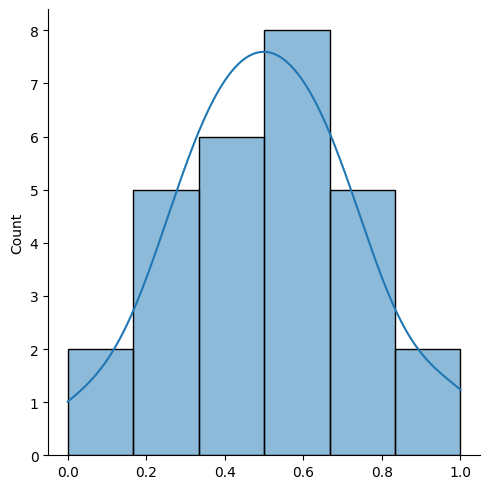

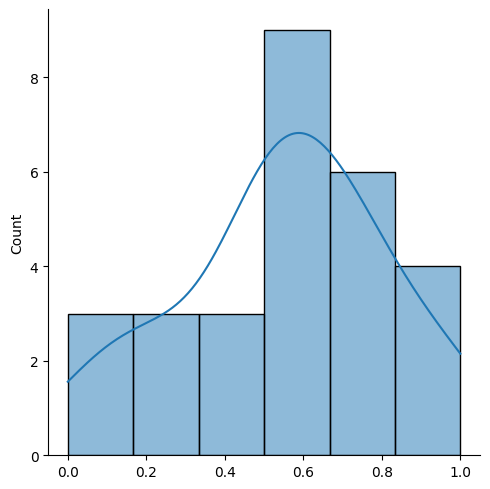

Mean of x: 0.5057843843255729
Mean of y: 0.5500346888298261
Standard deviation of x: 0.22119586445430808
Standard deviation of y: 0.2590435333262841


In [34]:
# plot the distribution of x and y coordinates for the filtered locational data
sns.displot(locs_scaled_filtered[:,0], kde=True)
plt.show()
sns.displot(locs_scaled_filtered[:,1], kde=True)
plt.show()

# compute mean and standard deviation of x and y coordinates for the filtered locational data
print('Mean of x:',np.mean(locs_scaled_filtered[:,0]))
print('Mean of y:',np.mean(locs_scaled_filtered[:,1]))
print('Standard deviation of x:',np.std(locs_scaled_filtered[:,0]))
print('Standard deviation of y:',np.std(locs_scaled_filtered[:,1]))


Original clustering: [0 0 3 0 3 5 2 6 1 5 1 5 4 7 8 7 3 7 2 7 2 4 2 2 2 2 1 2]
Noisy clustering: [3 6 1 6 1 5 5 7 2 5 2 5 4 3 8 3 1 3 8 0 0 4 5 0 0 8 2 0]


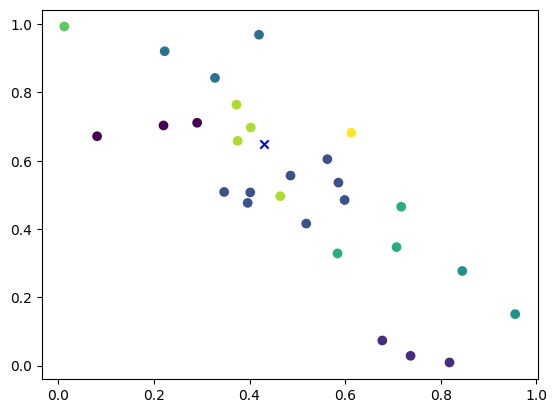

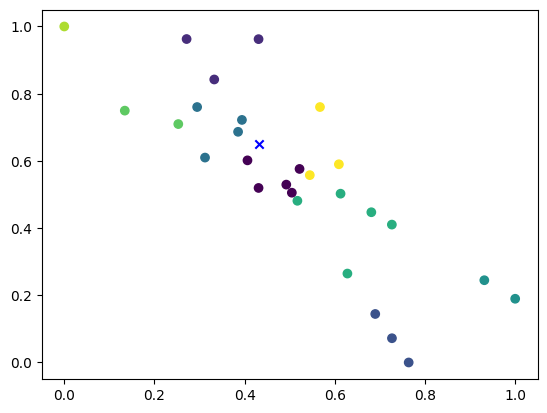

ARI between original clustering and noisy clustering: 0.4652330763245384
NMI between original clustering and noisy clustering: 0.8052623807879706


In [61]:
# now introduce some noise in the locational data and re-run the clustering to check the robustness of the clustering algorithms

# introduce noise in the locational data
locs_scaled_noisy = locs_scaled_filtered.copy()
# introduce noise in the x co-ordinates
locs_scaled_noisy[:,0] = locs_scaled_noisy[:,0] + np.random.normal(0,0.05,len(locs_scaled_noisy))	
# introduce noise in the y co-ordinates
locs_scaled_noisy[:,1] = locs_scaled_noisy[:,1] + np.random.normal(0,0.05,len(locs_scaled_noisy))

# re-run the k-means clustering
kmeans_noisy = KMeans(n_clusters=9, random_state=0, n_init=100)
kmeans_noisy.fit(locs_scaled_noisy)

kmeans = KMeans(n_clusters=9, random_state=0, n_init=100)
kmeans.fit(locs_scaled_filtered)

print('Original clustering:',kmeans.labels_)
print('Noisy clustering:',kmeans_noisy.labels_)

# plot the clusters
plt.scatter(locs_scaled_noisy[:,0],locs_scaled_noisy[:,1],c=kmeans.labels_)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()

plt.scatter(locs_scaled_filtered[:,0],locs_scaled_filtered[:,1],c=kmeans_noisy.labels_)
plt.scatter(origin_scaled[:,0],origin_scaled[:,1],color='blue', marker='x')
plt.show()

# compute agreement between the original clustering and the noisy clustering
ari = adjusted_rand_score(kmeans.labels_, kmeans_noisy.labels_)
print('ARI between original clustering and noisy clustering:',ari)

nmi = normalized_mutual_info_score(kmeans.labels_, kmeans_noisy.labels_)
print('NMI between original clustering and noisy clustering:',nmi)

In [ ]:
# same as above, but with NMI

nmi = normalized_mutual_info_score(kmeans.labels_, kmeans_noisy.labels_)